In [1]:
# RESULT: PASS. Corroborate with Needell Fulldata
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


In [2]:
data = LymeData({CHRONIC, NEURO},{DIAG_CIR, ADDL_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
train_results, test_results, reconerr_results = ssnmf.fulldatasearch(param_range={'k': [3,6],'lambda': np.linspace(0,1,10), 'random_state': range(0,5)}
                                                          , get_topic_accu_distr=True, get_reconerr_distr=True)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(878, 29)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'non_neuro', 'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


best train results:  (0.9715099715099715, {'k': 6, 'lambda': 1.0, 'random_state': 4}, 41.660608296739795, 6.5022207031426955, 0.5170454545454546)
best test results:  (0.6193181818181818, {'k': 3, 'lambda': 1.0, 'random_state': 3})


In [3]:
print(train_results)
print(test_results)


{'best_train_accu': 0.9715099715099715, 'best_train_param': {'k': 6, 'lambda': 1.0, 'random_state': 4}, 'train_accu_distr':            3         6
0   0.589744  0.586895
1   0.594017  0.579772
2   0.575499  0.596866
3   0.566952  0.612536
4   0.594017  0.599715
5   0.603989  0.601140
6   0.601140  0.595442
7   0.572650  0.603989
8   0.572650  0.621083
9   0.596866  0.613960
10  0.621083  0.616809
11  0.609687  0.613960
12  0.594017  0.618234
13  0.601140  0.626781
14  0.621083  0.623932
15  0.638177  0.638177
16  0.635328  0.625356
17  0.613960  0.676638
18  0.613960  0.652422
19  0.642450  0.628205
20  0.658120  0.682336
21  0.663818  0.633903
22  0.631054  0.719373
23  0.628205  0.676638
24  0.655271  0.628205
25  0.672365  0.680912
26  0.692308  0.631054
27  0.660969  0.739316
28  0.676638  0.696581
29  0.683761  0.690883
30  0.690883  0.727920
31  0.596866  0.719373
32  0.702279  0.757835
33  0.716524  0.712251
34  0.713675  0.712251
35  0.717949  0.774929
36  0.712251  0.784900
37

best_train_accu 0.9715099715099715
best_train_param {'k': 6, 'lambda': 1.0, 'random_state': 4}


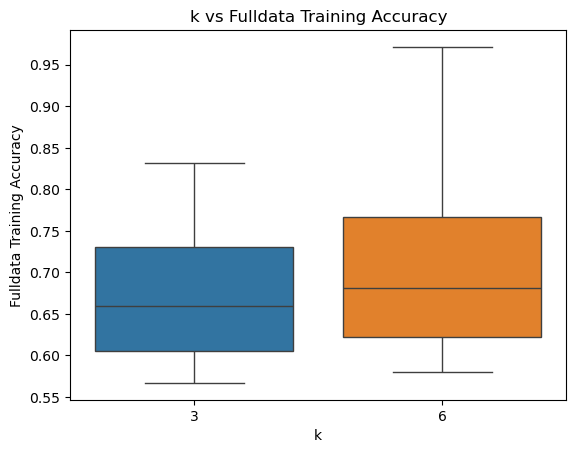

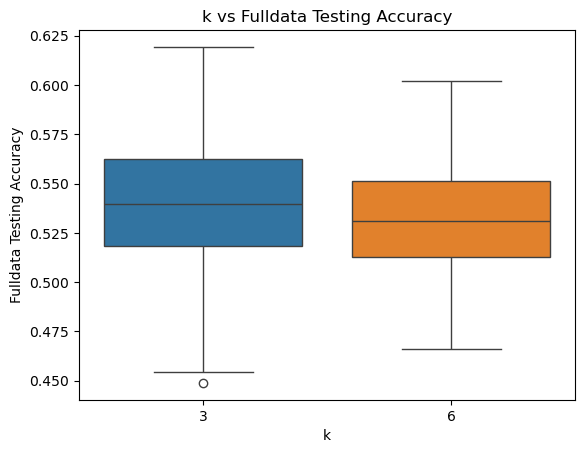

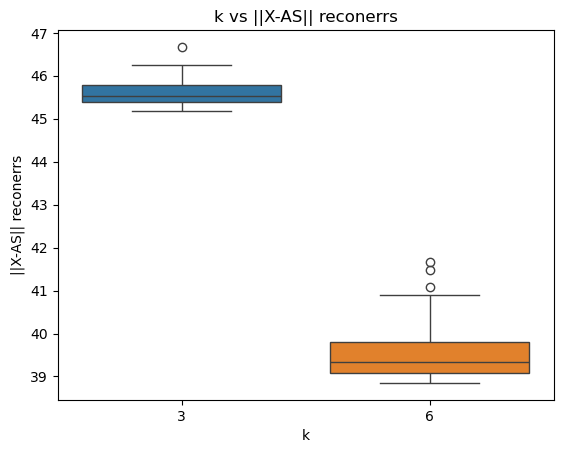

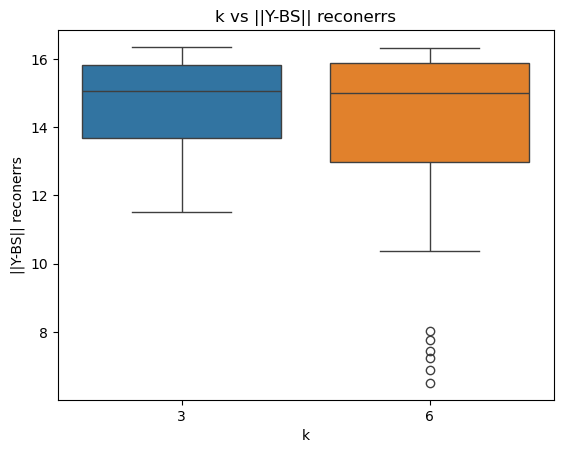

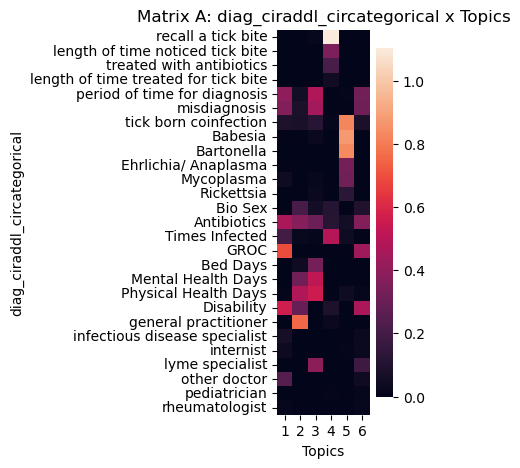

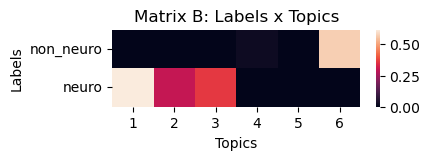

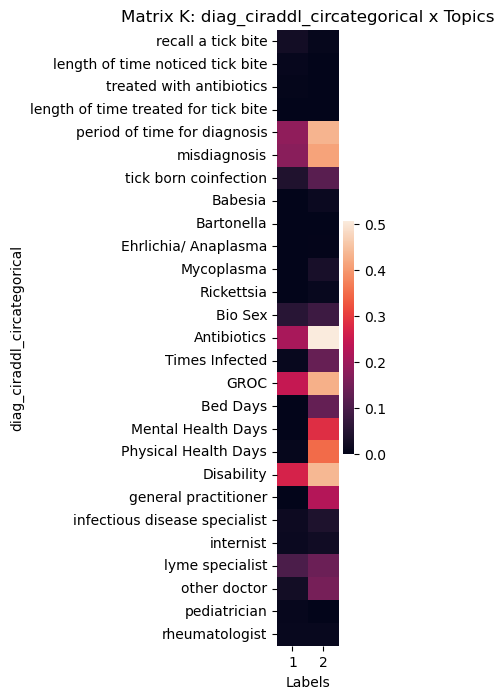

In [6]:
for k,v in train_results.items():
    if type(v) is not type(pd.DataFrame()):
        print(k,v)

# for k,v in test_results.items():
#     if type(v) is not type(pd.DataFrame()):
#         print(k,v)
        
train_accu_distr = train_results['train_accu_distr']
test_accu_distr = test_results['test_accu_distr']
Xreconerr_distr = reconerr_results['Xreconerr_distr']
Yreconerr_distr = reconerr_results['Yreconerr_distr']


display_distr(train_accu_distr, ylabel='Fulldata Training Accuracy')
display_distr(test_accu_distr, ylabel='Fulldata Testing Accuracy')

display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = DIAG_CIR + ADDL_CIR + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.fulldata_best_train_model

display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)
